# Data Mining Project 3 - Link Analysis

### Requirements

- PageRank algorithm implementation 1 - 7 graph
- HITS implementation 1 - 7 graph
- SimRank implementation 1 -5 graph
- Using data from project 1 (transaction data)
- Modified graph and analysis

### Extra functionality

- Using pygraphviz for graph visualization
- Standardize the `main.py` making the program as tool

### Default C=0.85, d=0.01 for this project

## Graph Dataset

1. graph_1.txt: 6 nodes, 5 edges
2. graph_2.txt: 5 nodes, 5 edges (a circle)
3. graph_3.txt: 4 nodes, 6 edges
4. graph_4.txt: 7 nodes, 18 edges (the example in Lecture3, p29)
5. graph_5.txt:  469 nodes, 1102 edges
6. graph_6.txt: 1228 nodes, 5220 edges (omitted for graph drawing)
7. graph_7.txt: 120 nodes, 6251 edges

### Ploting directional graph by pygraphviz (Graphviz)

By using the code below, we can visualize the graph from graph_x.txt

*For graph 5 and 6, there are too many nodes and edges to render, so we omit it*

In [1]:
import pygraphviz as pgv

if __name__ == "__main__":
    node_lengths = [6, 5, 4, 7]

    for i in range(len(node_lengths)):
        A = pgv.AGraph(directed=True)
        A.node_attr["shape"] = "circle"
        A.graph_attr["label"] = f"Graph {i + 1}"
        nodelist = [j + 1 for j in range(node_lengths[i])]
        A.add_nodes_from(nodelist)

        with open(f"data/graph_{i + 1}.txt", "r") as file_in:
            lines = file_in.readlines()
            for line in lines:
                items = line.strip().split(",")
                A.add_edge(items[0], items[1])

        A.layout(prog="dot")
        A.draw(f"graph/graph_{i + 1}.png")


### Advantage of plotting the actual graph
* We can edit the graph, add edge on these graph to analysis the change on the score of PageRank or HITS' authorities and hubs

## Find a way to improve scores (showing graph)

improve node 1

In [2]:
from IPython.display import Image

def draw(graph):
    return Image(graph.draw(format='png', prog='dot'))

pagerank:time 0.0006034374237060547 elapsed second(s)
hits:time 0.00010752677917480469 elapsed second(s)
pagerank:time 0.0005440711975097656 elapsed second(s)
hits:time 7.867813110351562e-05 elapsed second(s)
pagerank:time 0.0005042552947998047 elapsed second(s)
hits:time 0.00010848045349121094 elapsed second(s)


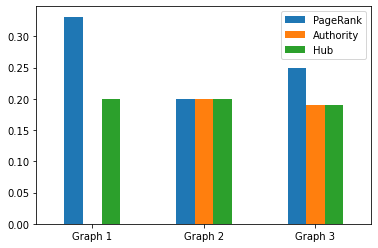

In [3]:
import pandas as pd
import numpy as np

from algorithm.pagerank import pagerank
from algorithm.hits import hits
from algorithm.simrank import get_simrank_matrix


node_lengths = [6, 5, 4]

node_1_pr = []
node_1_auth = []
node_1_hub = []
for i in range(3):
    # create numpy matrix
    matrix = np.zeros(tuple([node_lengths[i]] * 2))

    with open(f"data/graph_{i + 1}.txt", "r") as file_in:
        lines = file_in.readlines()
        for line in lines:
            items = line.strip().split(",")
            matrix[int(items[0]) - 1][int(items[1]) - 1] = 1

    # doing PageRank
    rank = pagerank(matrix)
    node_1_pr.append(rank[0])

    # doing HITS
    authorities, hubs = hits(matrix)
    node_1_auth.append(authorities[0])
    node_1_hub.append(hubs[0])

index = ['Graph 1', 'Graph 2', 'Graph 3']
df = pd.DataFrame({'PageRank': node_1_pr, 'Authority': node_1_auth, 'Hub': node_1_hub}, index=index)
ax = df.plot.bar(rot=0)


In [4]:
improve_pr = []
improve_auth = []
improve_hub = []

### Graph 1

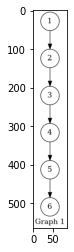

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

graph1 = plt.imread("graph/graph_1.png")
plt.imshow(graph1)

By inspecting the first implementation, we can see linking all other nodes to node 1 will only improve its PageRank and Auth. So maybe we can add outlink for node 1 to improve its Hub.

pagerank:time 0.000701904296875 elapsed second(s)
hits:time 0.0010631084442138672 elapsed second(s)
PageRank 0.16666666666666666
Auth 0.5462602224121806
Hub 0.0007902668553324433


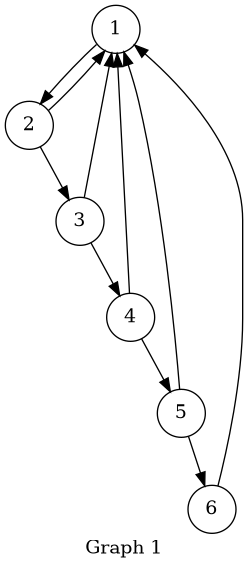

In [6]:
import pygraphviz as pgv


node_lengths = [6, 5, 4]

# create numpy matrix
matrix = np.zeros(tuple([node_lengths[0]] * 2))

A = pgv.AGraph(directed=True)
A.node_attr["shape"] = "circle"
A.graph_attr["label"] = f"Graph 1"
nodelist = [j + 1 for j in range(node_lengths[0])]
A.add_nodes_from(nodelist)

with open(f"data/graph_1.txt", "r") as file_in:
    lines = file_in.readlines()
    for line in lines:
        items = line.strip().split(",")
        A.add_edge(items[0], items[1])
        matrix[int(items[0]) - 1][int(items[1]) - 1] = 1

matrix[1][0] = 1
matrix[2][0] = 1
matrix[3][0] = 1
matrix[4][0] = 1
matrix[5][0] = 1
A.add_edge(2, 1)
A.add_edge(3, 1)
A.add_edge(4, 1)
A.add_edge(5, 1)
A.add_edge(6, 1)
rank = pagerank(matrix)
auths, hubs = hits(matrix)
print("PageRank", rank[0])
print("Auth", auths[0])
print("Hub", hubs[0])
improve_pr.append(rank[0])
improve_auth.append(auths[0])
improve_hub.append(hubs[0])

A.layout(prog="dot")

draw(A)

### Node 1 for graph 1

by adding an edge between all nodes with node 1

pagerank 

pagerank:time 0.0006241798400878906 elapsed second(s)
hits:time 0.0007441043853759766 elapsed second(s)
PageRank 0.16666666666666666
Auth 0.2695252679938744
Hub 0.26952526799387444


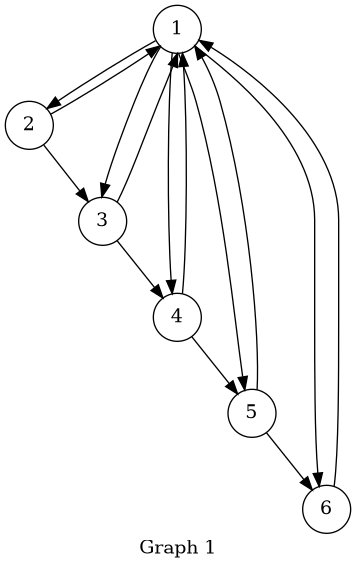

In [7]:
node_lengths = [6, 5, 4]

# create numpy matrix
matrix = np.zeros(tuple([node_lengths[0]] * 2))

A = pgv.AGraph(directed=True)
A.node_attr["shape"] = "circle"
A.graph_attr["label"] = f"Graph 1"
nodelist = [j + 1 for j in range(node_lengths[0])]
A.add_nodes_from(nodelist)

with open(f"data/graph_1.txt", "r") as file_in:
    lines = file_in.readlines()
    for line in lines:
        items = line.strip().split(",")
        A.add_edge(items[0], items[1])
        matrix[int(items[0]) - 1][int(items[1]) - 1] = 1

matrix[1][0] = 1
matrix[2][0] = 1
matrix[3][0] = 1
matrix[4][0] = 1
matrix[5][0] = 1
matrix[0][1] = 1
matrix[0][2] = 1
matrix[0][3] = 1
matrix[0][4] = 1
matrix[0][5] = 1
A.add_edge(2, 1)
A.add_edge(3, 1)
A.add_edge(4, 1)
A.add_edge(5, 1)
A.add_edge(6, 1)
A.add_edge(1, 2)
A.add_edge(1, 3)
A.add_edge(1, 4)
A.add_edge(1, 5)
A.add_edge(1, 6)
rank = pagerank(matrix)
auths, hubs = hits(matrix)
print("PageRank", rank[0])
print("Auth", auths[0])
print("Hub", hubs[0])
improve_pr.append(rank[0])
improve_auth.append(auths[0])
improve_hub.append(hubs[0])

A.layout(prog="dot")

draw(A)

### Graph 1 Modification Conclusion

For graph 1 if we add outbound edges and add inboud edges both authorities and hubs will increase. refer the graph below

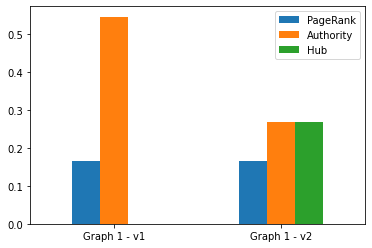

In [8]:
df = pd.DataFrame({'PageRank': improve_pr, 'Authority': improve_auth, 'Hub': improve_hub}, index=["Graph 1 - v1", "Graph 1 - v2"])
ax = df.plot.bar(rot=0)


### Graph 2


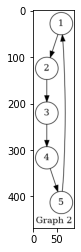

In [9]:
graph2 = plt.imread("graph/graph_2.png")
plt.imshow(graph2)

pagerank:time 0.0014722347259521484 elapsed second(s)
hits:time 0.0004944801330566406 elapsed second(s)
PageRank 0.2
Auth 0.28910529519172246
Hub 0.2891052951917225


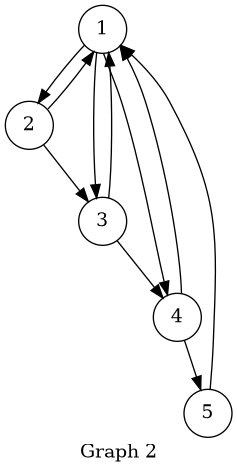

In [10]:
improve_pr = []
improve_auth = []
improve_hub = []
node_lengths = [6, 5, 4]

# create numpy matrix
matrix = np.zeros(tuple([node_lengths[1]] * 2))

A = pgv.AGraph(directed=True)
A.node_attr["shape"] = "circle"
A.graph_attr["label"] = f"Graph 2"
nodelist = [j + 1 for j in range(node_lengths[1])]
A.add_nodes_from(nodelist)

with open(f"data/graph_2.txt", "r") as file_in:
    lines = file_in.readlines()
    for line in lines:
        items = line.strip().split(",")
        A.add_edge(items[0], items[1])
        matrix[int(items[0]) - 1][int(items[1]) - 1] = 1

matrix[1][0] = 1
matrix[2][0] = 1
matrix[3][0] = 1
matrix[4][0] = 1
matrix[0][1] = 1
matrix[0][2] = 1
matrix[0][3] = 1
matrix[0][4] = 1
A.add_edge(2, 1)
A.add_edge(3, 1)
A.add_edge(4, 1)
A.add_edge(1, 2)
A.add_edge(1, 3)
A.add_edge(1, 4)
rank = pagerank(matrix)
auths, hubs = hits(matrix)
print("PageRank", rank[0])
print("Auth", auths[0])
print("Hub", hubs[0])
improve_pr.append(rank[0])
improve_auth.append(auths[0])
improve_hub.append(hubs[0])

A.layout(prog="dot")

draw(A)

### Graph 2 Modification Conclusion

#### Same Trick Does Twice

For graph 2 if we add outbound edges and add inboud edges both authorities and hubs will increase. refer the graph below

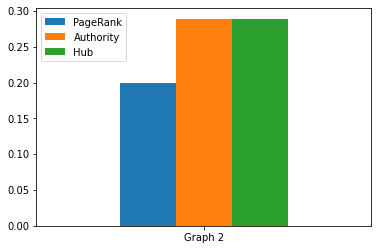

In [11]:
df = pd.DataFrame({'PageRank': improve_pr, 'Authority': improve_auth, 'Hub': improve_hub}, index=["Graph 2"])
ax = df.plot.bar(rot=0)

### Graph 3

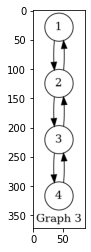

In [12]:
graph3 = plt.imread("graph/graph_3.png")
plt.imshow(graph3)

pagerank:time 0.001043081283569336 elapsed second(s)
hits:time 0.00023055076599121094 elapsed second(s)
PageRank 0.25
Auth 0.2807017543859649
Hub 0.2807017543859649


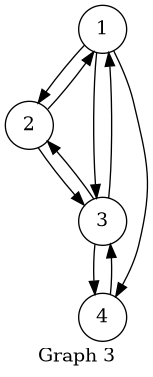

In [13]:
improve_pr = []
improve_auth = []
improve_hub = []
node_lengths = [6, 5, 4]

# create numpy matrix
matrix = np.zeros(tuple([node_lengths[2]] * 2))

A = pgv.AGraph(directed=True)
A.node_attr["shape"] = "circle"
A.graph_attr["label"] = f"Graph 3"
nodelist = [j + 1 for j in range(node_lengths[2])]
A.add_nodes_from(nodelist)

with open(f"data/graph_3.txt", "r") as file_in:
    lines = file_in.readlines()
    for line in lines:
        items = line.strip().split(",")
        A.add_edge(items[0], items[1])
        matrix[int(items[0]) - 1][int(items[1]) - 1] = 1

matrix[1][0] = 1
matrix[2][0] = 1
matrix[3][0] = 1
matrix[0][1] = 1
matrix[0][2] = 1
matrix[0][3] = 1
A.add_edge(2, 1)
A.add_edge(3, 1)
A.add_edge(1, 2)
A.add_edge(1, 3)
A.add_edge(1, 4)
rank = pagerank(matrix)
auths, hubs = hits(matrix)
print("PageRank", rank[0])
print("Auth", auths[0])
print("Hub", hubs[0])
improve_pr.append(rank[0])
improve_auth.append(auths[0])
improve_hub.append(hubs[0])

A.layout(prog="dot")

draw(A)

### Graph 3 Modification Conclusion

#### Same Trick Does Twice

For graph 3 if we add outbound edges and add inboud edges both authorities and hubs will increase. refer the graph below

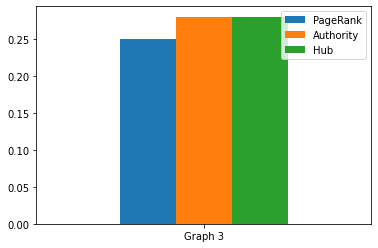

In [14]:
df = pd.DataFrame({'PageRank': improve_pr, 'Authority': improve_auth, 'Hub': improve_hub}, index=["Graph 3"])
ax = df.plot.bar(rot=0)

### Graph 4

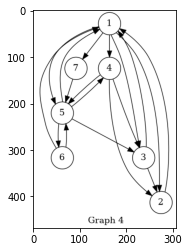

In [15]:
graph4 = plt.imread("graph/graph_4.png")
plt.imshow(graph4)

## Graph 7

For this project, we have to do one more graph (graph 7) from project 1 dataset, which is generated by the IBM quest data generator, the data needs to farther process to match the `graph_x.txt` format, then apply the PageRank and HITS algorithm on it.

### Randomly assign forward direction, backward direction and bidirection to the transaction rows

By using `random.choice`, we can generate the new `graph_7.txt`

In [16]:
import random


def generate_graph_7(filename, output_file):
    """Generate graph from project 1 transaction data `kaggle dataset`."""

    with open(filename, "r") as filein:
        lines = filein.readlines()
        filein.close()            
        
    with open(output_file, "a+") as fileout:
        ibm_data = [
            [token for token in line.strip().split(" ") if token]
            for line in lines
        ]
        
        data_dict = {}
        for tx in ibm_data:
            if tx[0] in data_dict:
                data_dict[tx[0]].append(tx[2])
            else:
                data_dict[tx[0]] = [tx[2]]
        
        for row in data_dict.values():
            for i in range(1, len(row)):
                direction = random.choice(["-->", "<-->", "<--"])
                if direction == "-->":
                    fileout.write(f"{row[i - 1]},{row[i]}\n")
                elif direction == "<-->":
                    fileout.write(f"{row[i - 1]},{row[i]}\n")
                    fileout.write(f"{row[i]},{row[i - 1]}\n")
                elif direction == "<--":
                    fileout.write(f"{row[i]},{row[i - 1]}\n")
        
        fileout.close()

        
generate_graph_7("ibm.txt", "data/graph_7.txt")

### Determine the nodes of the data

Although in project 1, data description is known, but I still implement a function to determine dataset's nodes and its length, and length of the edges. 

In [17]:
def calculate_nodes(filename):
    with open(filename, "r") as filein:
        lines = filein.readlines()
        nodes = set({})
        for line in lines:
            nodes = nodes.union({node for node in line.strip().split(",")})
        filein.close()
        return nodes
        
calculate_nodes("data/graph_7.txt")

{'0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99'}

### Apply algorithm

After data preprocessing, run both PageRank and HITS algorithms on the `graph_7.txt`.

*Results are generated in output folder as requirement from this project*

In [18]:
import numpy as np
from algorithm.pagerank import pagerank
from algorithm.hits import hits


# create numpy matrix
node_length = len(calculate_nodes("data/graph_7.txt"))

matrix = np.zeros(tuple([node_length] * 2))

with open(f"data/graph_7.txt", "r") as file_in:
    lines = file_in.readlines()
    lines = list(set(lines))
    for line in lines:
        items = line.strip().split(",")
        matrix[int(items[0])][int(items[1])] = 1

# doing PageRank
rank = pagerank(matrix)
np.savetxt(f"output/graph_7_PageRank.txt", rank, newline=" ", fmt="%.8g")

# doing HITS
authorities, hubs = hits(matrix)
np.savetxt(f"output/graph_7_HITS_authority.txt", authorities, newline=" ", fmt="%.8g")
np.savetxt(f"output/graph_7_HITS_hub.txt", hubs, newline=" ", fmt="%.8g")

pagerank:time 0.015480756759643555 elapsed second(s)
hits:time 0.10195469856262207 elapsed second(s)


## Performance

using a time_execution decarator to track the execution time

```
GRAPH 1
pagerank:time 0.0017428398132324219 elapsed second(s)
hits:time 0.00032901763916015625 elapsed second(s)
get_simrank_matrix:time 0.001088857650756836 elapsed second(s)


GRAPH 2
pagerank:time 0.0022399425506591797 elapsed second(s)
hits:time 0.00017905235290527344 elapsed second(s)
get_simrank_matrix:time 0.003037691116333008 elapsed second(s)


GRAPH 3
pagerank:time 0.0013606548309326172 elapsed second(s)
hits:time 0.0004425048828125 elapsed second(s)
get_simrank_matrix:time 0.05679655075073242 elapsed second(s)


GRAPH 4
pagerank:time 0.0011124610900878906 elapsed second(s)
hits:time 0.0010828971862792969 elapsed second(s)
get_simrank_matrix:time 27.571231842041016 elapsed second(s)


GRAPH 5
pagerank:time 0.10701584815979004 elapsed second(s)
hits:time 1.2485368251800537 elapsed second(s)


GRAPH 6
pagerank:time 0.629643440246582 elapsed second(s)
hits:time 15.791640043258667 elapsed second(s)


```

We can find that HITS algorithm has the best performance, second best is PageRank, then SimRank has an exponential growth of computation time.

## Implementation Detail

### PageRank

```=python
@execution_timer
def pagerank(adj_matrix, num_iterations: int = 100, d: float = 0.85):
    # init
    n = adj_matrix.shape[0]

    for i in range(n):
        pointout_sum = sum(adj_matrix[i])
        for j in range(n):
            if adj_matrix[i][j]:
                adj_matrix[i][j] /= pointout_sum

    l = adj_matrix.T
    r = np.ones(n) / n

    for i in range(num_iterations):
        # calculation
        r = d * (r @ l) + (1 - d) / n
        r = r / sum(r)

    return r
```

### HITS

```=python
@execution_timer
def hits(adj_matrix, precision=0.001):
    # init
    node_len = adj_matrix.shape[0]

    old_authorities = np.ones(node_len)
    old_hubs = np.ones(node_len)

    new_authorities = np.zeros(node_len)
    new_hubs = np.zeros(node_len)

    while 1:
        counter+=1
        for i in range(node_len):
            for j in range(node_len):
                # points to it
                if adj_matrix[:, i][j]:
                    new_authorities[i] += old_hubs[j]

                # it points to
                if adj_matrix[i][j]:
                    new_hubs[i] += old_authorities[j]

        # normalization
        auth_sum = sum(new_authorities)
        hub_sum = sum(new_hubs)
        new_authorities = new_authorities / auth_sum
        new_hubs = new_hubs / hub_sum

        # check for convergence, if not, continue doing
        if (
            (np.absolute(new_authorities - old_authorities) < precision).all()
            and
            (np.absolute(new_hubs - old_hubs) < precision).all()
        ):
            break
        else:
            old_authorities = new_authorities.copy()
            old_hubs = new_hubs.copy()

    return new_authorities, new_hubs
```

### SimRank

```=python
def get_parents(node, adj_matrix):
    return np.where(adj_matrix.T[node] > 0)[0]


def simrank(nodes, adj_matrix, C=0.5, level=1):
    nodes_parents = [get_parents(node, adj_matrix) for node in nodes]
    if len(nodes_parents[0]) == 0 or len(nodes_parents[1]) == 0 or C ** level < 0.01:
        return 0
    else:
        total = 0
        for a_parent in nodes_parents[0]:
            for b_parent in nodes_parents[1]:
                if a_parent == b_parent:
                    total += 1
                else:
                    compare_nodes = (a_parent, b_parent)
                    total += simrank(compare_nodes, adj_matrix, C, level + 1)

        return (C / (len(nodes_parents[0]) * len(nodes_parents[1]))) * total


@execution_timer
def get_simrank_matrix(n, adj_matrix):
    simrank_matrix = np.zeros(adj_matrix.shape)
    for i in range(n):
        for j in range(n):
            simrank_matrix[i][j] = simrank((i, j), adj_matrix)
    return simrank_matrix
```

## Discussion

What I learn in this project is too quickly catch up the algorithms that helped improve the world (the internet). Although these algorithms are somehow old and even outdated. I think it is still a good practice on implementing these algorithms, so that we can analysis and spot the flaw of these algorithms and learn something from it.

Another point of view is for us, as a student, aside from this project, we need to learn things beyond this project. Understand state of the art algorithm is also the huge part of hour duty in this course.

## Questions & Discussion

### Limitations

* Despite its popularity in various applications (e.g., web search and social networks), SimRank has an undesirable trait, i.e., “zero-similarity”: it accommodates only the paths of equal length from a common “center” node, whereas a large portion of other paths are f*ully ignored
* links to a large number of separate topics may receive a high hub rank which is not relevant to the given query. Though this page is not the most relevant source for any information, it still has a very high hub rank if it points to highly ranked authorities. authority and hub web pages
* One of the limitations of the PageRank algorithm is that it's ordering does not favor current events (Cornell, 2015). According to the algorithm, old pages typically have more votes because they have more links from other reputable pages.

From my discover
* SimRank is way slower than the other two

### Real World Problem
* There are billions of website out there, we have to opetimize the algorithm so that it can be run in a real server. I am not sure whether this is legit, but in our project, when we run a huge adjency matrix, time performance will go worser and worser.
* These methods are outdated, google deprecated pagerank for a long time
* They have flaw, we are meant to use other new methods to cope with drawbacks of these algorithms.